In [17]:
import torch
import torch.nn.functional as F
from torch.nn import GRU, Linear, ReLU, Sequential

import torch_geometric.transforms as T
from torch_geometric.datasets import QM9
from torch_geometric.loader import DataLoader
from torch_geometric.nn import NNConv, Set2Set
from torch_geometric.utils import remove_self_loops

import pprint
from os.path import join
from pathlib import Path
import numpy as np
import pandas as pd

import plotly.graph_objects as go

import gc
import torch

from ax.storage.json_store.save import save_experiment
from ax.plot.trace import optimization_trace_single_method
from ax.service.managed_loop import optimize
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

from rdkit import Chem  # To extract information of the molecules
from rdkit.Chem import Draw  # To draw the molecules
import random

In [18]:
def seed(seed=0):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed(0)

Create directories

In [2]:
# create dir https://stackoverflow.com/a/273227/13697228
qm9_dir = "qm9_data"
experiment_dir = "experiments"
figure_dir = "figures"
Path(experiment_dir).mkdir(parents=True, exist_ok=True)
Path(figure_dir).mkdir(parents=True, exist_ok=True)

Path(qm9_dir).mkdir(parents=True, exist_ok=True)

## The QM9 dataset
The QM9 dataset can be loaded from torch_geometric

In [3]:
qm9 =QM9(qm9_dir)
qm9[0]

Data(x=[5, 11], edge_index=[2, 8], edge_attr=[8, 4], y=[1, 19], pos=[5, 3], z=[5], smiles='[H]C([H])([H])[H]', name='gdb_1', idx=[1])

Let's visualise some of the molecules

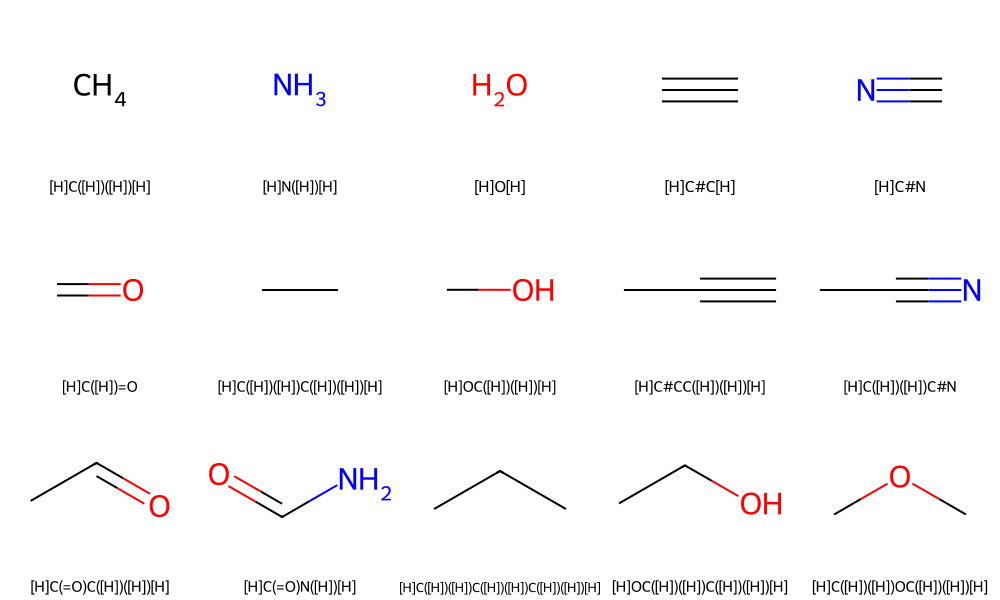

In [11]:
smiles = [qm9[i].smiles for i in range(15)]
mols = [Chem.MolFromSmiles(smile) for smile in smiles]
Draw.MolsToGridImage(mols, molsPerRow=5, useSVG=True,legends=smiles)

In [ ]:
For a simple

## Ax

In [4]:
# Create a setup which allows fast testing

dummy = True
if dummy:
    n_splits =2
    total_trials = 10
else:
    n_splits = 5
    total_trials = 100

Let's define a simple GCN with 3 convolutional layers, one global pooling layer

In [ ]:
class GCN(torch.nn.Module):
    """GCN with 3 convolution layers and a linear output layer"""
    def __init__(self, dim_h):
        """

        Args:
            hidden_dim (int): the dimension of the hidden layers
        """
        super().__init__()
        self.conv1 = GCNConv(

In [ ]:
parameters = [
    {"name":